In [53]:
##tutorial 1 - 1

#Old Version TensorFlow
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

xData = [1, 2, 3, 4, 5, 6, 7]
yData = [25000, 55000, 75000, 110000, 128000, 155000, 180000]
W = tf.Variable(tf.random_uniform([1], -100, 100)) #Weight (가중치), random_uniform => -100 ~ 100 값
b = tf.Variable(tf.random_uniform([1], -100, 100))#Bias (y 절편)
X = tf.placeholder(tf.float32) #placeholder라는 하나의 틀
Y = tf.placeholder(tf.float32)
H = W*X+b #Hypothesis Formula
cost = tf.reduce_mean(tf.square(H-Y)) #Cost Value, [H(예측값) - Y(실제 값)]의 제곱의 평균 값, 비용함수는 (이상치-실제값)의 제곱의 평균
a = tf.Variable(0.01) #하강 알고리즘에서 한번에 얼만큼 점프할건지, (step 크기 값)
optimizer = tf.train.GradientDescentOptimizer(a) #기본적인 경사하강 라이브러리 중 하나
train = optimizer.minimize(cost) #cost값이 가장 작은 값으로 train
init = tf.global_variables_initializer() #변수 초기화
sess = tf.Session() #세션 초기화
sess.run(init) 

#학습시작
for i in range(5001):
    sess.run(train, feed_dict={X: xData, Y: yData}) #학습진행
    if i%500 == 0: #500번의 한번씩 과정 
        print(i, sess.run(cost, feed_dict={X: xData, Y: yData}), sess.run(W), sess.run(b))
print(sess.run(H, feed_dict={X: [8]})) #X값이 8일때의 예측 값

0 4613765000.0 [10340.304] [2070.9717]
500 8687297.0 [25537.32] [1951.1791]
1000 8633817.0 [25627.479] [1504.7281]
1500 8632678.0 [25640.615] [1439.6721]
2000 8632655.0 [25642.531] [1430.1888]
2500 8632649.0 [25642.805] [1428.82]
3000 8632656.0 [25642.844] [1428.633]
3500 8632657.0 [25642.848] [1428.6133]
4000 8632657.0 [25642.848] [1428.6133]
4500 8632657.0 [25642.848] [1428.6133]
5000 8632657.0 [25642.848] [1428.6133]
[206571.39]


In [54]:
##tutorial 1 - 2

#Constant
a1 = tf.constant(1)
b1 = tf.constant(2)
c1 = tf.add(a1,b1)
sess = tf.Session()
sess.run(c1)



3

In [55]:
#Variable
a2 = tf.Variable(5)
b2 = tf.Variable(3)
c2 = tf.multiply(a2, b2)
init = tf.global_variables_initializer() # Variable이 있을 시, initializer가 필요
sess = tf.Session()
sess.run(init)
sess.run(c2)
#Variable 변경 시,c2 값을 다시 초기화 해야 함

15

In [60]:
##tutorial 1 - 3

#placeholder (학습 데이터를 포함하는 변수)
#placeholder는 다른 tensor를 할당하기 위해 사용, 또한 실제로 값을 할당할 때는 Feeding을 수행

#여러 개의 데이터에 대해서 각각 5와 더한 값을 반환하는 프로그램 (y = x + 5) [x : 입력, y : 출력] => x = placeholder
#tf.placeholder(dtype, shape, name) => dtype: placeholder에 저장되는 자료형, shape: 배열의 차원, name: placeholder의 이름
input = [1, 2, 3, 4, 5]
x = tf.placeholder(dtype = tf.float32)
y = x+5
sess = tf.Session()
sess.run(y, feed_dict={x: input}) #x의 값으로 input 리스트를 넣어서 y와 식을 나타냄

array([ 6.,  7.,  8.,  9., 10.], dtype=float32)

In [61]:
mathScore = [85, 99, 84, 97, 92]
englishScore = [59, 80, 84, 68, 77]
a = tf.placeholder(dtype=tf.float32) #placeholder를 간단하게 그릇이라고 표현
b = tf.placeholder(dtype=tf.float32)
y1 = (a+b)/2
sess = tf.Session()
sess.run(y1, feed_dict={a: mathScore, b: englishScore})

array([72. , 89.5, 84. , 82.5, 84.5], dtype=float32)

In [63]:
##tutorial 1 - 4

'''
tf.truediv (나눗셈의 몫), tf.mod (나눗셈의 나머지), tf.abs (절댓값)
tf.negative (음수 반환), tf.sign (부호 반환 [pos: +1, neg: -1, zeroL 0]), tf.square (제곱), tf.sqrt(제곱근)
tf.pow(value, n) (n차 제곱), tf.maximum (최댓값), tf.exp (지수 값), tf.log (로그값)
'''


In [72]:
##tutorial 1 - 5
#Python Big Data K-means Algorithm(K-평균) -> clustering 중 하나
#clustering: 여러 개의 데이터가 있을 때, 데이터를 군집화하는 것 (비슷한 데이터끼리 묶으면 관리하기가 쉽다는 장점)
#사전 준비: 데이터의 주제 및 개수 준비 (무작위 중심 값 설정)
#K-means 수행 과정: 중심(centroid)에 가까운 데이터를 cluster에 포함한 후, 중심을 cluster 중앙으로 이동 (반복 수행)

#K-means++: 무작위 중심 값이 아닌 자동으로 적절한 cluster 중심 위치를 찾아주는 알고리즘/

#빅 데이터 분석 라이브러리: Pandas, Numpy, Matplotlib
'''
Numpy: 연산 처리를 용이하게 하기 위해 사용
Pandas: 데이터 포인트를 만들기 위해 사용
Matplotlin: 데이터 시각화를 위해 사용
'''

from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.DataFrame(columns=['x', 'y']) #데이터 프레임 설정
#각 데이터 프레임 위치 값 설정
df.loc[0] = [2,3]
df.loc[1] = [2,11]
df.loc[2] = [2,18]
df.loc[3] = [4,5]
df.loc[4] = [4,7]
df.loc[5] = [5,3]
df.loc[6] = [5,15]
df.loc[7] = [6,6]
df.loc[8] = [6,8]
df.loc[9] = [6,9]
df.loc[10] = [7,2]
df.loc[11] = [7,4]
df.loc[12] = [7,5]
df.loc[13] = [7,17]
df.loc[14] = [7,18]
df.loc[15] = [8,5]
df.loc[16] = [8,4]
df.loc[17] = [9,10]
df.loc[18] = [9,11]
df.loc[19] = [9,15]
df.loc[20] = [9,19]
df.loc[21] = [10,5]
df.loc[22] = [10,8]
df.loc[23] = [10,18]
df.loc[24] = [12,6]
df.loc[25] = [13,5]
df.loc[26] = [14,11]
df.loc[27] = [15,6]
df.loc[28] = [15,18]
df.loc[29] = [18,12]

df.head(30) #데이터 프레임 출력


,x,y
0,2,3
1,2,11
2,2,18
3,4,5
4,4,7
5,5,3
6,5,15
7,6,6
8,6,8
9,6,9


Text(0.42499999999999716, 0.5, 'y')

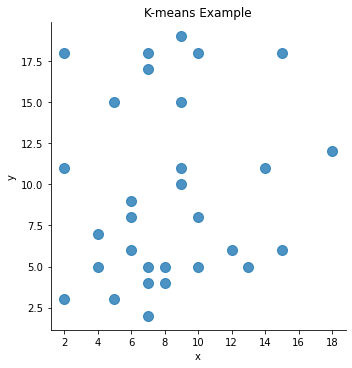

In [75]:
#데이터 시각화
sb.lmplot('x', 'y', data=df, fit_reg=False, scatter_kws={"s": 100})
plt.title('K-means Example')
plt.xlabel('x')
plt.ylabel('y')

In [81]:
#K-means Clustering
points = df.values #데이터 프레임의 값을 numpy 객체로 초기화
kmeans = KMeans(n_clusters = 4).fit(points) #cluster를 4개 생성
kmeans.cluster_centers_ #각 cluster의 중심을 만듬 (4개의 cluster 중심 위치 표시)
#무작위 중심 값 때문에, 중심 값이 매 실행마다 변경됨


array([[ 5.53846154,  5.53846154],
       [15.66666667, 13.66666667],
       [11.14285714,  7.28571429],
       [ 7.        , 17.14285714]])

In [82]:
kmeans.labels_ #cluster별로 데이터 분류 표시

array([0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 2, 2, 3, 3, 2,
       2, 3, 2, 2, 1, 2, 1, 1])

In [83]:
df['cluster'] = kmeans.labels_ #cluster라는 속성을 만들고, 그 값을 cluster 분류로 나타냄
df.head(30)

,x,y,cluster
0,2,3,0
1,2,11,0
2,2,18,3
3,4,5,0
4,4,7,0
5,5,3,0
6,5,15,3
7,6,6,0
8,6,8,0
9,6,9,0


Text(0.5, 1.0, 'K-means Example')

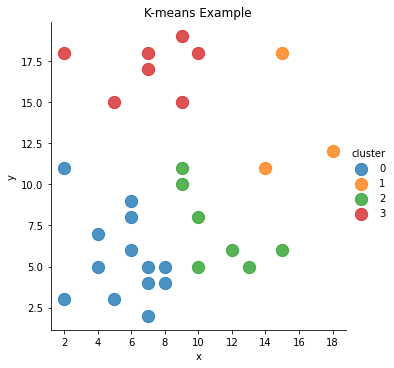

In [86]:
sb.lmplot('x', 'y', data=df, fit_reg=False, scatter_kws={"s": 150}, hue='cluster')
plt.title('K-means Example')